# AlphaZero
深層学習・強化学習・探索
# 人工知能プログラミング実践入門

# ニューラルネットワーク

## ニューラルネットワークで分類

### パッケージのインポート

In [0]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### データの読み込み
mnist

In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### 読み込みデータのシェイプ表示

In [3]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### データセットの確認
画像データ

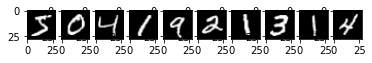

In [4]:
NUMS = 10
for i in range(NUMS):
    plt.subplot(1, NUMS, i+1)
    plt.imshow(train_images[i], 'gray')
plt.show()

### データセットの確認
ラベルデータ

In [5]:
print(train_labels[:NUMS])

[5 0 4 1 9 2 1 3 1 4]


### 前処理
リシェイプ: 28×28 → 784

In [6]:
train_images = train_images.reshape((train_images.shape[0], 784))
test_images = test_images.reshape((test_images.shape[0], 784))

print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


### 前処理
ラベルのone-hot変換

In [7]:
print('********** 変換前 **********')
print(train_labels.shape)
print(train_labels[0])
print(test_labels.shape)
print(test_labels[0])

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print('********** 変換後 **********')
print(train_labels.shape)
print(train_labels[0])
print(test_labels.shape)
print(test_labels[0])

********** 変換前 **********
(60000,)
5
(10000,)
7
********** 変換後 **********
(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
(10000, 10)
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


### モデルの作成

　全結合(ユニット×256，シグモイド関数)

　　↓

　全結合(ユニット×128，シグモイド関数)

　　↓

　ドロップアウト

　　↓

　全結合(ユニット×10，ソフトマックス関数)

In [0]:
model = Sequential()
model.add(Dense(256, activation='sigmoid', input_shape=(784,)))
model.add(Dense(128, activation='sigmoid'))
# 活性化関数を分離した記述方法
# model.add(Dense(128))
# model.add(Activation('sigmoid'))
model.add(Dropout(rate=0.5))
model.add(Dense(10, activation='softmax'))

## 活性化関数(Activation Function)

### シグモイド関数(sigmoid)

\begin{align}
f(x) = \frac{ 1 }{1 + exp(-x)}
\end{align}

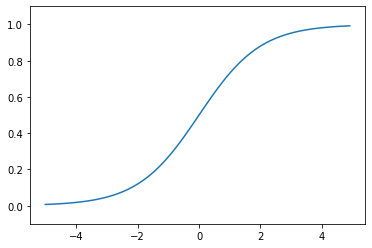

In [9]:
def sigmoid(x):
    return 1 / (1+np.exp(-x)) 

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### tanh関数(tanh)

\begin{align}
f(x) = tanh(x)
\end{align}

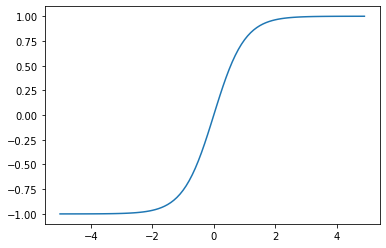

In [10]:
def tanh(x):
    return np.tanh(x)

x = np.arange(-5.0, 5.0, 0.1)
y = tanh(x)
plt.plot(x, y)
plt.ylim(-1.1, 1.1)
plt.show()

### 恒等関数(linear)

\begin{align}
f(x) = x
\end{align}

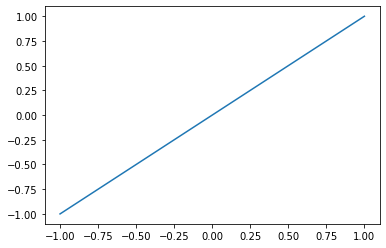

In [11]:
def linear(x):
    return x

x = np.arange(-1.0, 1.1, 0.1)
y = linear(x)
plt.plot(x, y)
plt.ylim(-1.1, 1.1)
plt.show()

### ReLU関数(relu)

\begin{align}
f(x) = max(0, x)
\end{align}

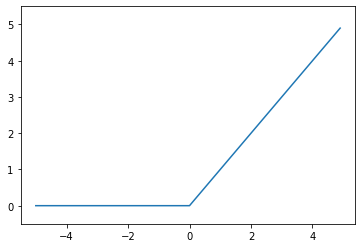

In [12]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-0.5, 5.5)
plt.show()

## コンパイル

### 損失関数(Loss Function)



*   2クラス交差エントロピー誤差(binary_crossentropy)： **2値分類**
*   多クラス交差エントロピー誤差(categorical_crossentropy)： **多値分類**
*   平均二乗誤差(mse)： **回帰**



### 最適化関数(Optimizer)



*   SGD
*   Adam



### 評価指数(Evaluation Index)



*   正解率(Accuracy)： **分類**(1に近いほうが良い)
*   平均絶対誤差(Mean Absolute Error)： **回帰**(0に近いほうが良い)



### コンパイル

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.1), metrics=['acc'])

### 学習

In [14]:
"""fit
    validation_split: 検証用データの割合
""" 
history = model.fit(train_images, train_labels, batch_size=500, epochs=5, validation_split=0.2)

Epoch 1/5
96/96 [==============================] - 2s 18ms/step - loss: 1.7324 - acc: 0.4366 - val_loss: 1.0086 - val_acc: 0.8303
Epoch 2/5
96/96 [==============================] - 2s 16ms/step - loss: 0.9465 - acc: 0.7336 - val_loss: 0.5971 - val_acc: 0.8817
Epoch 3/5
96/96 [==============================] - 2s 16ms/step - loss: 0.6808 - acc: 0.8116 - val_loss: 0.4429 - val_acc: 0.8985
Epoch 4/5
96/96 [==============================] - 2s 17ms/step - loss: 0.5538 - acc: 0.8476 - val_loss: 0.3737 - val_acc: 0.9085
Epoch 5/5
96/96 [==============================] - 2s 16ms/step - loss: 0.4844 - acc: 0.8663 - val_loss: 0.3315 - val_acc: 0.9137


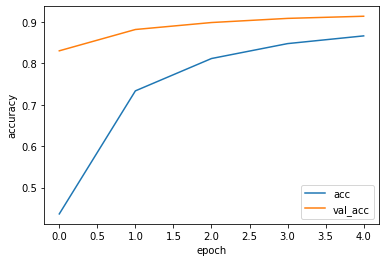

In [15]:
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()

### 評価

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('loss: {:.1f}% , acc: {:.1f}%'.format(test_loss*100, test_acc*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.3367 - acc: 0.9137
loss: 33.7% , acc: 91.4%


## 推論

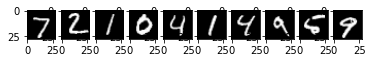

Answer[ 7 ]:  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.98  0.00  0.02 
Answer[ 2 ]:  0.01  0.02  0.81  0.04  0.00  0.03  0.06  0.00  0.03  0.00 
Answer[ 1 ]:  0.00  0.99  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00 
Answer[ 0 ]:  0.98  0.00  0.00  0.00  0.00  0.01  0.00  0.00  0.00  0.00 
Answer[ 4 ]:  0.00  0.00  0.00  0.00  0.91  0.00  0.00  0.01  0.00  0.07 
Answer[ 1 ]:  0.00  0.99  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00 
Answer[ 4 ]:  0.00  0.00  0.00  0.00  0.86  0.03  0.00  0.01  0.01  0.09 
Answer[ 9 ]:  0.00  0.01  0.00  0.01  0.19  0.02  0.00  0.02  0.04  0.70 
Answer[ 6 ]:  0.05  0.01  0.07  0.00  0.07  0.03  0.75  0.00  0.01  0.01 
Answer[ 9 ]:  0.00  0.00  0.00  0.00  0.06  0.00  0.00  0.10  0.01  0.82 


In [17]:
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(test_images[i].reshape((28, 28)), 'gray')
plt.show()

test_predictions = model.predict(test_images[0:10])

# argmax: 最大値のインデックスに変換
test_answers = np.argmax(test_predictions, axis=1)

for test_answer, test_predict in zip(test_answers, test_predictions):
    print(f'Answer[ {test_answer} ]: ', end='')
    for p in test_predict:
        print(' {:.2f} '.format(p), end='')
    print('')